##Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue
BoomBikes aspires to understand the demand for shared bikes among the people. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features.
The model should be built taking this 'cnt' as the target variable.



Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Step 1: Reading and Understanding data

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [169]:
# Read input
day = pd.read_csv('/content/drive/Othercomputers/My Laptop/UPGRAD/machine learning/linear regression assignment/day.csv')

In [170]:
# Check dataframe
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [171]:
day.shape

(730, 16)

In [172]:
# Check nulls and datatypes
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [173]:
# No nulls
# Convert dteday to datetime format
day['dteday'] = pd.to_datetime(day['dteday'], format='%d-%m-%Y')

In [174]:
# drop instant column as index is not needed
day= day.drop(['instant'], axis=1)

In [175]:
# Check changed datatype
day.dtypes

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [176]:
day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualizing Data

In [177]:
# Group categorical variables and numerical variables
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

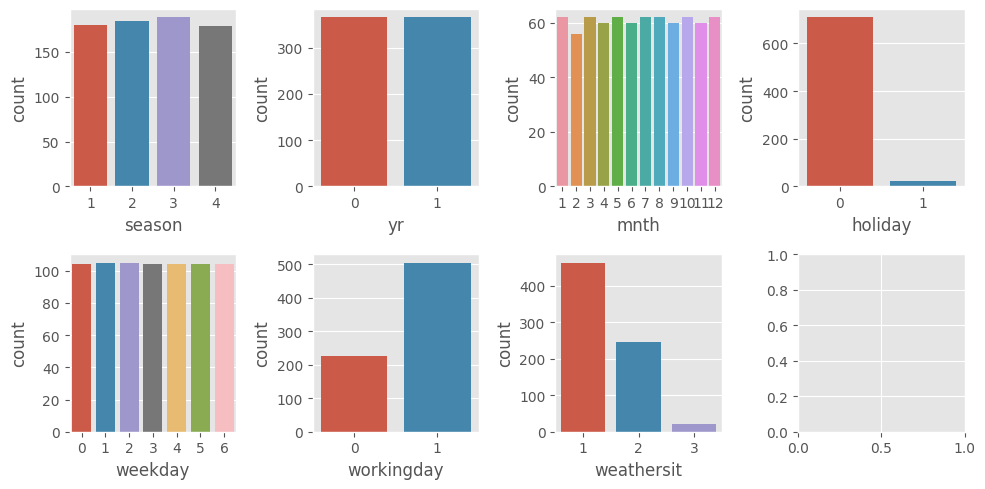

In [178]:
# Exploratory Data Analysis of categorical variables
plt.style.use('ggplot')

fig, axes = plt.subplots(2, 4, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=day, ax=axes[i])
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

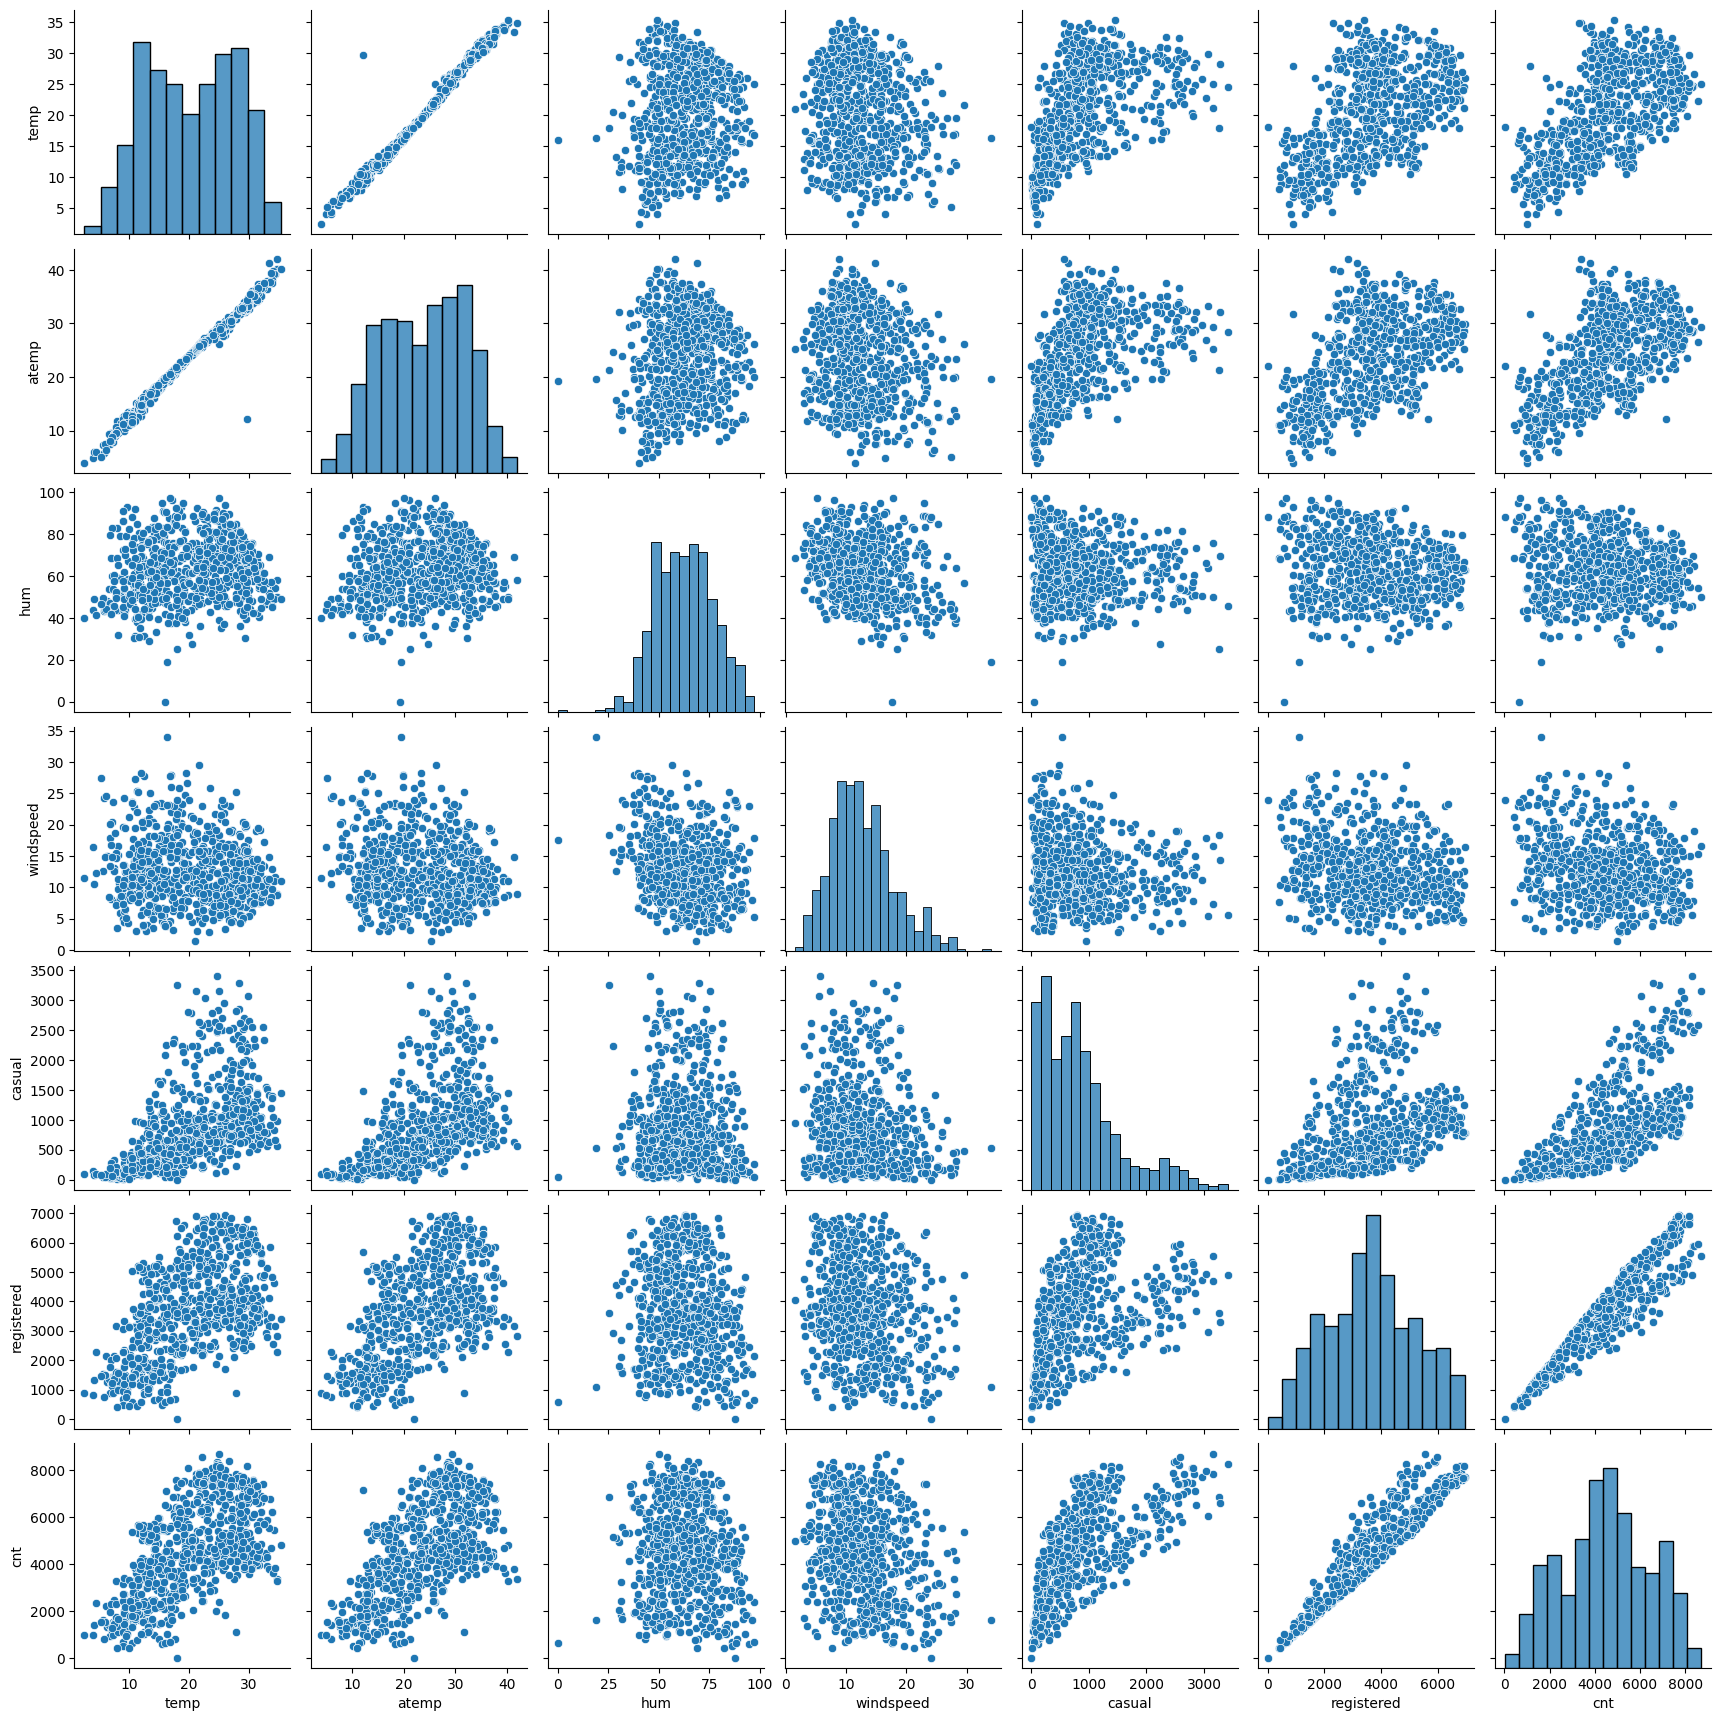

In [179]:
# Exploratory Data Analysis of numerical variables
plt.style.use('default')
sns.pairplot(day, vars= num_cols)
plt.show()

In [180]:
day[num_cols].corr()['cnt']

temp          0.627044
atemp         0.630685
hum          -0.098543
windspeed    -0.235132
casual        0.672123
registered    0.945411
cnt           1.000000
Name: cnt, dtype: float64

In [181]:
# We can see cnt has highest correlation with registered, casual, atemp and temp

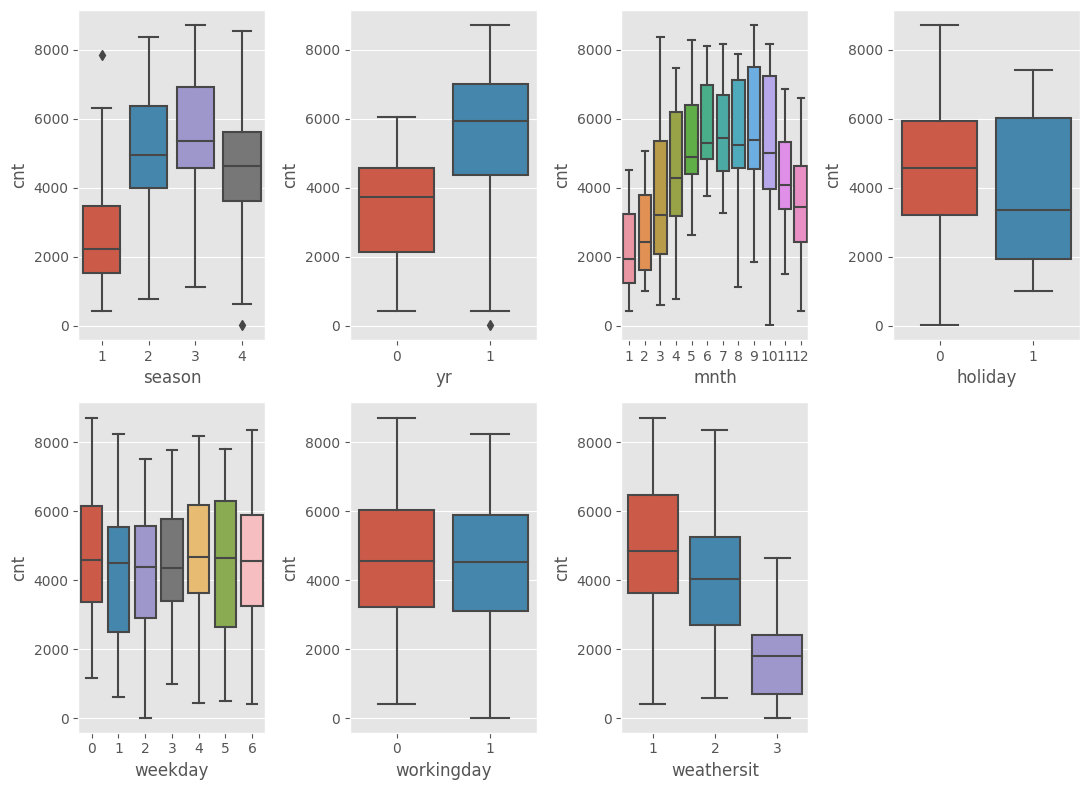

In [182]:
# Lets check boxplot of cnt wrt category variables
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=[11,8])

# loop through each categorical variable
for i, col in enumerate(cat_cols):
    # create a subplot
    plt.subplot(2, 4, i+1)
    # create a boxplot of cnt with respect to the categorical variable
    sns.boxplot(x=col, y='cnt', data=day)
    # set the x and y labels
    plt.xlabel(col)
    plt.ylabel('cnt')
# adjust the spacing between subplots
plt.tight_layout()
# show the plot
plt.show()

In [183]:
# cnt is has highest range and median in season number 3 ie fall at 6000+ 
# cnt has highest median=6000 and range when yr=1 ie 2019
# cnt was highest during months 6 to 10 which decreased thereafter
# at holidays cnt has median < 4000 whereas when its not holiday cnt median is >4000
# median for cnt is somewhat same at all weekdays
# cnt for working day and non working is not that much different
# cnt is highest at weather 1 ie  Clear, Few clouds, Partly cloudy, Partly cloudy

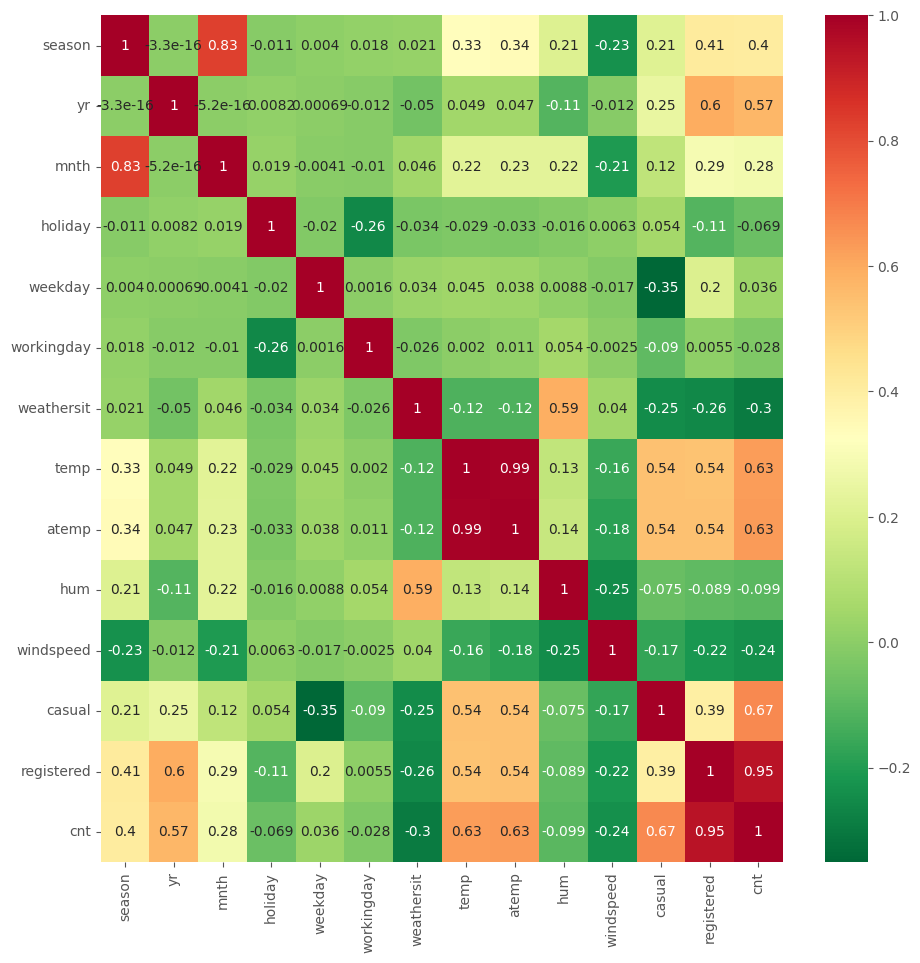

In [184]:
# Heatmap of all variables 
plt.figure(figsize=[11,11])
sns.heatmap(day.corr(),cmap= 'RdYlGn_r', annot=True)
plt.show()

## Data Preparation

In [185]:
# Data Preprocessing
# Encode categorical variables
data = pd.get_dummies(day, columns=['season', 'weathersit', 'mnth', 'weekday'])

In [186]:
data.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,1,0,0,0,0,0
1,2018-01-02,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,1,0,0,0,0
2,2018-01-03,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,1,0,0,0
3,2018-01-04,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,1,0,0
4,2018-01-05,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,1,0


In [187]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [188]:
# drop dteday as its not useful in linear regression
data= data.drop('dteday', axis=1)

In [189]:
# drop casual and registered also as cnt is sum of them hence already included in table
data = data.drop(['casual', 'registered'], axis=1)

## Splitting the data into training and testing set

In [190]:
# Split data into training and testing sets
np.random.seed(0)
data_train, data_test = train_test_split(data,train_size = 0.8, test_size=0.2, random_state=100)

In [191]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
367,1,0,1,6.150000,6.31375,44.1250,24.499957,2236,1,0,...,0,0,0,0,0,0,0,1,0,0
648,1,0,1,17.835000,21.55835,46.3333,12.166932,7570,0,0,...,1,0,0,0,0,0,0,0,1,0
44,0,0,1,17.015000,19.91750,37.5833,27.999836,1913,1,0,...,0,0,0,0,0,0,1,0,0,0
705,1,0,0,13.154153,16.09790,76.4167,8.750200,5008,0,0,...,0,0,1,0,0,0,0,0,0,1
379,1,0,1,6.833347,8.08125,41.9167,16.834286,2311,1,0,...,0,0,0,0,0,1,0,0,0,0


In [192]:
# Scale the numeric features
scaler = MinMaxScaler()
num_vars= ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

In [193]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,1,0,...,0,0,0,0,0,0,0,1,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,...,1,0,0,0,0,0,0,0,1,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,1,0,...,0,0,0,0,0,0,1,0,0,0
705,1,0,0,0.326094,0.318824,0.787463,0.189819,0.573631,0,0,...,0,0,1,0,0,0,0,0,0,1
379,1,0,1,0.133996,0.108365,0.431945,0.449210,0.263346,1,0,...,0,0,0,0,0,1,0,0,0,0


In [194]:
data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.726027,0.537414,0.513175,0.649499,0.319463,0.515792,0.251712,0.246575,...,0.092466,0.080479,0.087329,0.130137,0.155822,0.159247,0.136986,0.145548,0.152397,0.119863
std,0.500241,0.163378,0.446377,0.225336,0.211663,0.144219,0.168114,0.225336,0.434369,0.431387,...,0.289931,0.272267,0.282558,0.336743,0.362997,0.366220,0.344128,0.352955,0.359714,0.325080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.522837,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.691872,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


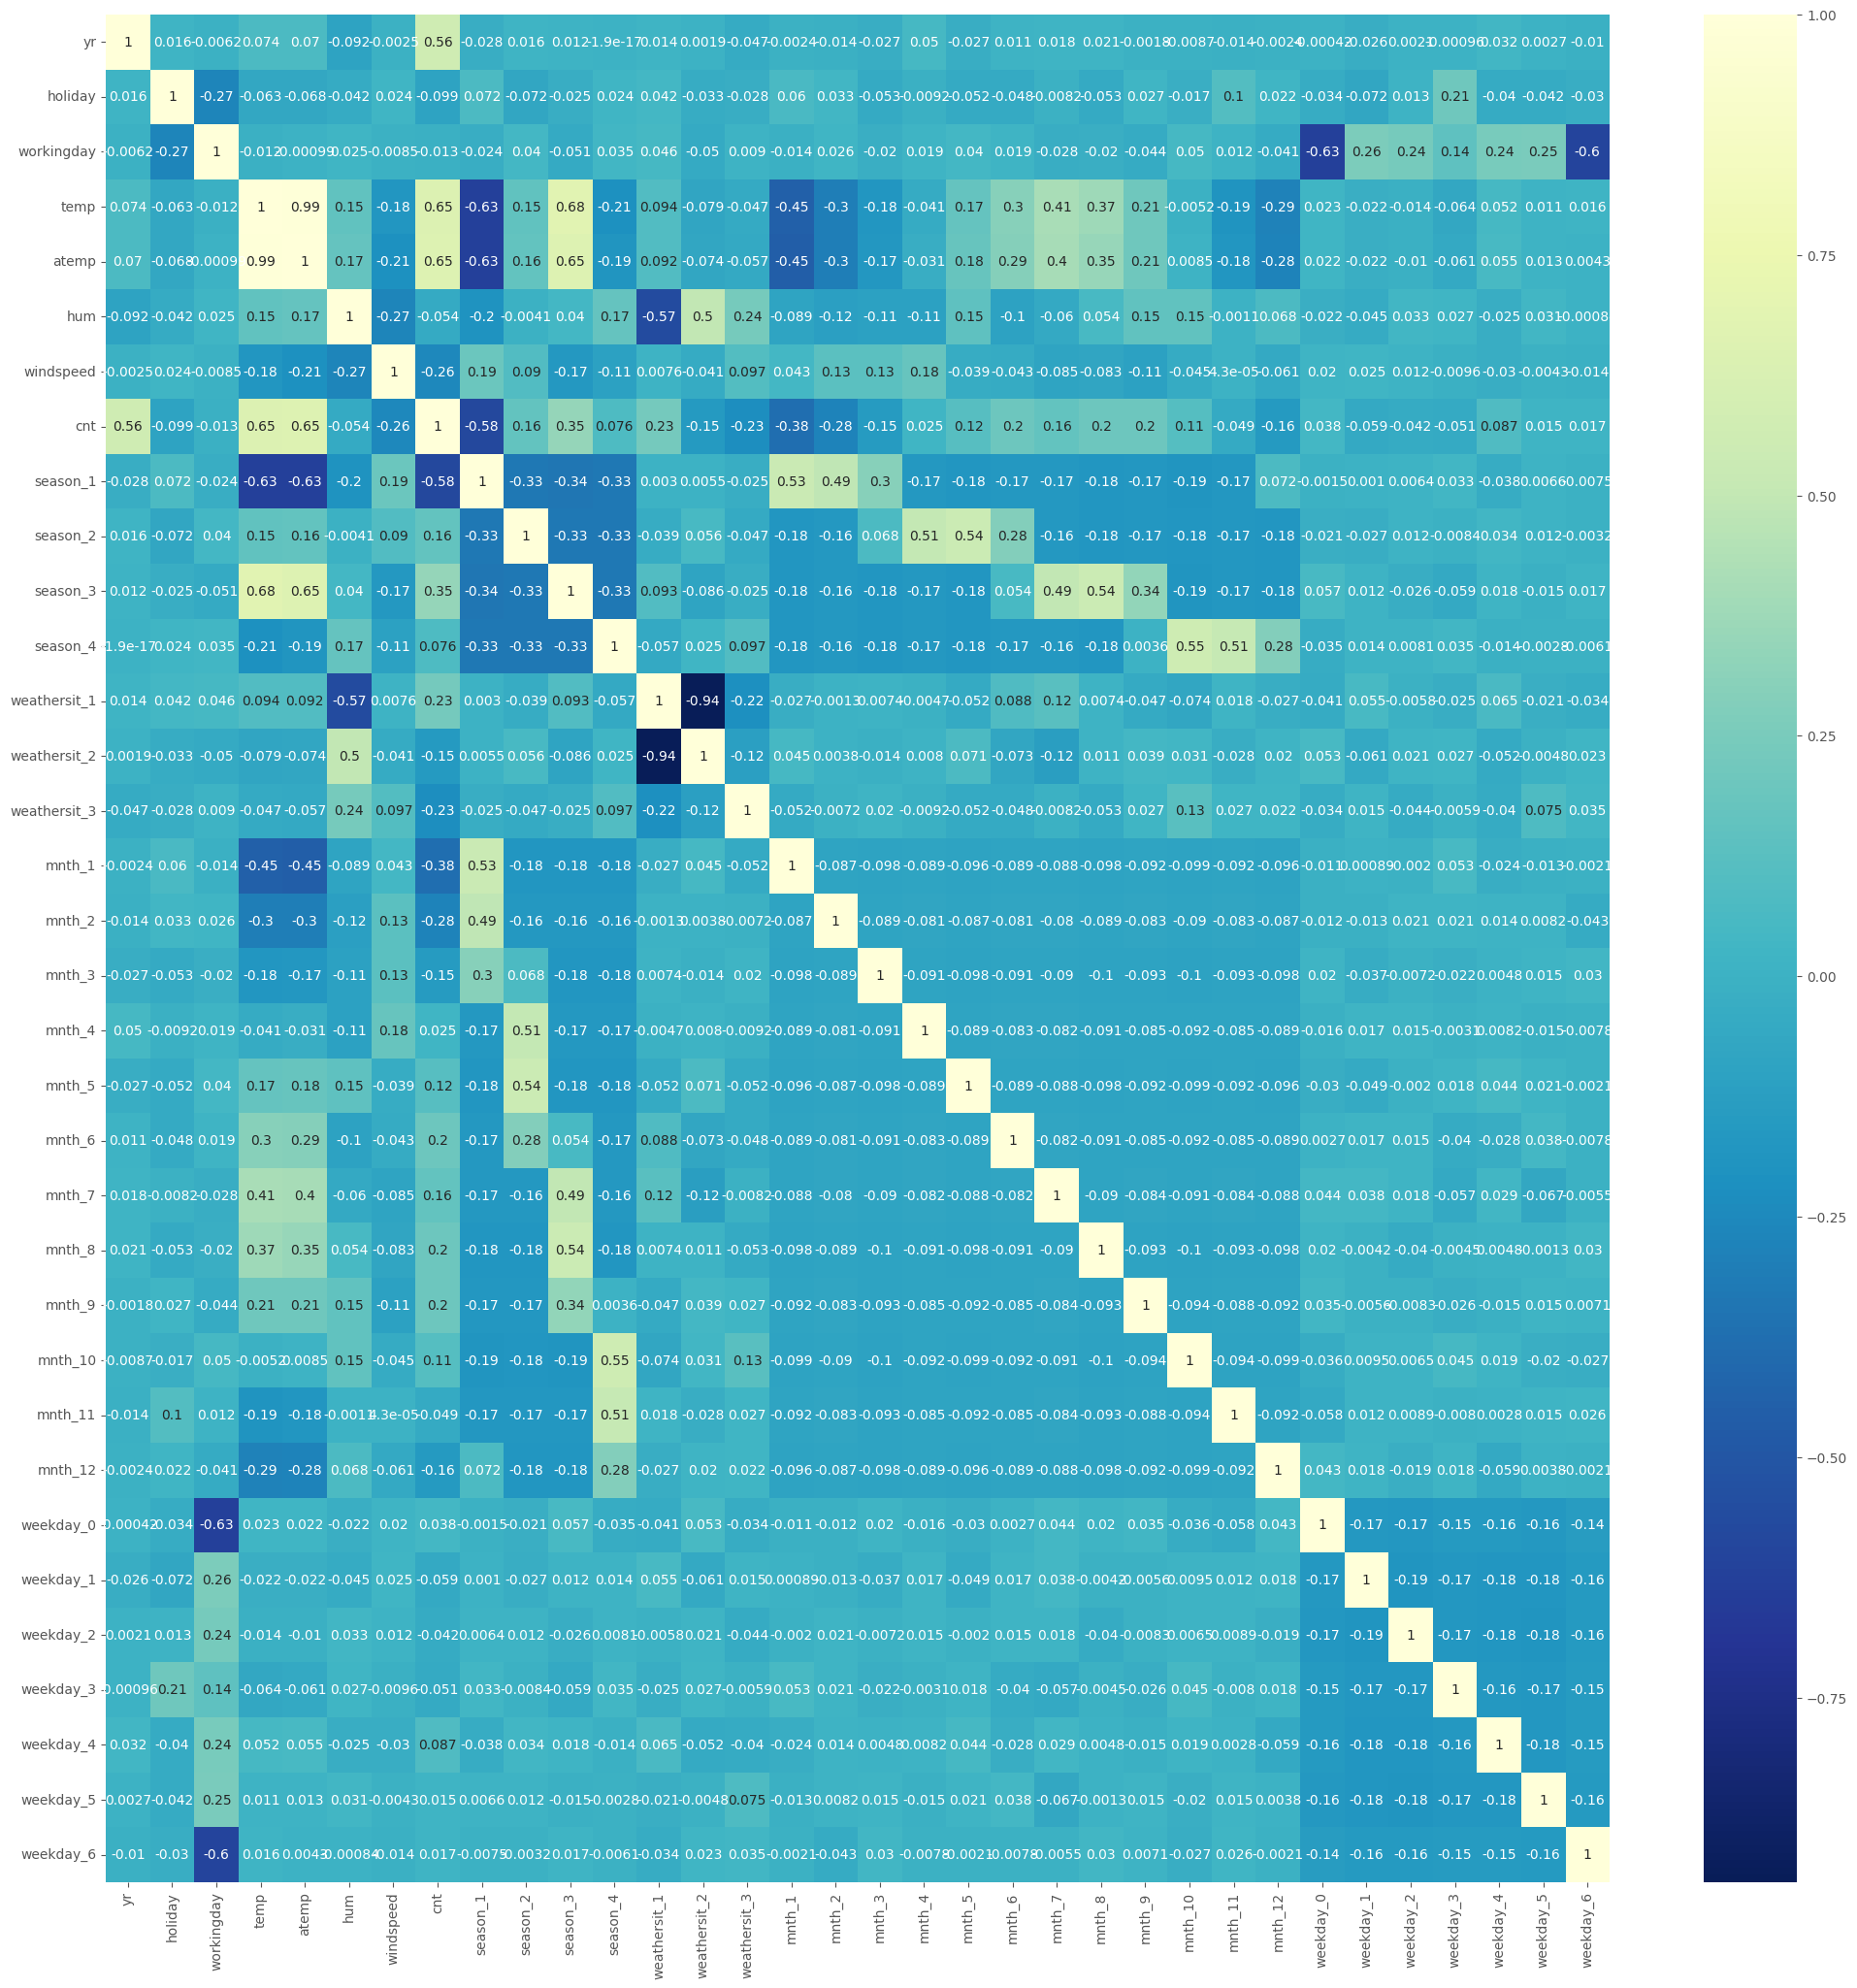

In [195]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu_r")
plt.show()

In [196]:
data_train.corr()['cnt'].sort_values()

season_1       -0.578981
mnth_1         -0.380351
mnth_2         -0.279250
windspeed      -0.257141
weathersit_3   -0.227423
mnth_12        -0.157106
weathersit_2   -0.154258
mnth_3         -0.145839
holiday        -0.098829
weekday_1      -0.058872
hum            -0.054329
weekday_3      -0.051432
mnth_11        -0.048784
weekday_2      -0.042424
workingday     -0.013175
weekday_5       0.015236
weekday_6       0.017199
mnth_4          0.025350
weekday_0       0.038023
season_4        0.075521
weekday_4       0.087066
mnth_10         0.105144
mnth_5          0.119423
season_2        0.158561
mnth_7          0.161941
mnth_8          0.200454
mnth_9          0.201005
mnth_6          0.202074
weathersit_1    0.228525
season_3        0.346158
yr              0.562873
temp            0.648240
atemp           0.652090
cnt             1.000000
Name: cnt, dtype: float64

In [197]:
# cnt has highest correlation with season_1, mnth_1, atemp, yr, season_3, weathersit_1

# Bulding Models


In [198]:
y_train = data_train.pop('cnt')
X_train = data_train

In [199]:
# Model 1

In [200]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     112.5
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          5.25e-211
Time:                        07:07:24   Log-Likelihood:                 605.53
No. Observations:                 584   AIC:                            -1151.
Df Residuals:                     554   BIC:                            -1020.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1511      0.034      4.497   

In [201]:
# Drop variables with higher p value weekday_6, weekday_0, weekday_1, weekday_2, weekday_3, mnth_11, mnth_10, mnth_7, mnth_6, mnth_4, mnth_3, mnth_2

In [202]:
# Model 2

In [203]:
X_train_lm = X_train_lm.drop(['weekday_6', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'mnth_11', 'mnth_10', 'mnth_7', 'mnth_6', 'mnth_4', 'mnth_3', 'mnth_2'], axis=1)

# Create a fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     167.6
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          1.89e-217
Time:                        07:07:24   Log-Likelihood:                 595.09
No. Observations:                 584   AIC:                            -1150.
Df Residuals:                     564   BIC:                            -1063.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1449      0.021      6.934   

In [204]:
# Model 3

In [205]:
# Again lets drop variables with high p value season_3, mnth_5

In [206]:
X_train_lm = X_train_lm.drop([ 'mnth_5', 'season_3'], axis=1)

# Create a fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

print(lr_3.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     177.0
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          1.81e-218
Time:                        07:07:24   Log-Likelihood:                 594.82
No. Observations:                 584   AIC:                            -1152.
Df Residuals:                     565   BIC:                            -1069.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1354      0.028      4.841   

In [207]:
# Model 4

In [208]:
# Drop season_1 and atemp with high p value
X_train_lm = X_train_lm.drop(['season_1', 'atemp'], axis=1)

# Create a fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     198.9
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          2.64e-220
Time:                        07:07:24   Log-Likelihood:                 593.71
No. Observations:                 584   AIC:                            -1153.
Df Residuals:                     567   BIC:                            -1079.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1143      0.024      4.814   

In [209]:
# Model 5

In [210]:
# drop mnth_12
X_train_lm = X_train_lm.drop(['mnth_12'], axis=1)

# Create a fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

print(lr_5.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     211.0
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          1.01e-220
Time:                        07:07:24   Log-Likelihood:                 591.92
No. Observations:                 584   AIC:                            -1152.
Df Residuals:                     568   BIC:                            -1082.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1094      0.024      4.626   

In [211]:
# Model 6

In [212]:
# drop mnth_1 with 0.064 p value
X_train_lm = X_train_lm.drop(['mnth_1'], axis=1)

# Create a fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

print(lr_6.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     224.9
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          3.66e-221
Time:                        07:07:25   Log-Likelihood:                 590.15
No. Observations:                 584   AIC:                            -1150.
Df Residuals:                     569   BIC:                            -1085.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1001      0.023      4.322   

In [213]:
# all variables have less than 0.05 p value hence are significant. lets check VIF

In [214]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [215]:
# check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,weathersit_1,inf
10,weathersit_2,inf
11,weathersit_3,inf
5,hum,1.91
4,temp,1.53
12,mnth_8,1.42
7,season_2,1.40
8,season_4,1.30
3,workingday,1.28
13,mnth_9,1.21


In [216]:
#Model 7

In [217]:
# Drop all values with infinite VIF, lets keep only variables with positive VIF

In [218]:
X_train_lm = X_train_lm.drop(['weathersit_1','weathersit_2', 'weathersit_3'], axis=1)

# Create a fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()

print(lr_7.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     217.4
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          7.33e-204
Time:                        07:07:25   Log-Likelihood:                 543.54
No. Observations:                 584   AIC:                            -1061.
Df Residuals:                     571   BIC:                            -1004.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3194      0.026     12.255      0.0

In [219]:
# Model 8

In [220]:
# Drop weekday_5 with highest p value
X_train_lm = X_train_lm.drop(['weekday_5'], axis=1)

# Create a fitted model
lr_8 = sm.OLS(y_train, X_train_lm).fit()

print(lr_8.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     236.6
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          1.21e-204
Time:                        07:07:25   Log-Likelihood:                 542.57
No. Observations:                 584   AIC:                            -1061.
Df Residuals:                     572   BIC:                            -1009.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3187      0.026     12.219      0.0

In [221]:
# Model 9

In [222]:
# drop weekday_4 with highest p value
X_train_lm = X_train_lm.drop(['weekday_4'], axis=1)

# Create a fitted model
lr_9 = sm.OLS(y_train, X_train_lm).fit()

print(lr_9.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     258.7
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          4.87e-205
Time:                        07:07:25   Log-Likelihood:                 540.62
No. Observations:                 584   AIC:                            -1059.
Df Residuals:                     573   BIC:                            -1011.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3194      0.026     12.217      0.0

In [223]:
# Model 10

In [224]:
# Drop workingday with highest p value
X_train_lm = X_train_lm.drop(['workingday'], axis=1)

# Create a fitted model
lr_10 = sm.OLS(y_train, X_train_lm).fit()

print(lr_10.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     286.2
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          1.14e-205
Time:                        07:07:25   Log-Likelihood:                 539.18
No. Observations:                 584   AIC:                            -1058.
Df Residuals:                     574   BIC:                            -1015.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3079      0.025     12.178      0.0

In [225]:
# All p values are 0 hence all variables seem significant. LEts check VIF

In [226]:
# check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,39.73
3,temp,1.44
8,mnth_8,1.42
6,season_2,1.38
7,season_4,1.29
9,mnth_9,1.20
4,hum,1.17
5,windspeed,1.13
1,yr,1.02
2,holiday,1.01


In [227]:
# Model 11

In [228]:
# Drop Const as it has highest VIF
X_train_lm = X_train_lm.drop(['const'], axis=1)

# Create a fitted model
lr_11 = sm.OLS(y_train, X_train_lm).fit()

print(lr_11.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              1677.
Date:                Tue, 04 Apr 2023   Prob (F-statistic):                        0.00
Time:                        07:07:25   Log-Likelihood:                          472.08
No. Observations:                 584   AIC:                                     -926.2
Df Residuals:                     575   BIC:                                     -886.8
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [229]:
# Model 12

In [230]:
# Drop variable with high p value
X_train_lm = X_train_lm.drop(['mnth_8'], axis=1)

# Create a fitted model
lr_12 = sm.OLS(y_train, X_train_lm).fit()

print(lr_12.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              1879.
Date:                Tue, 04 Apr 2023   Prob (F-statistic):                        0.00
Time:                        07:07:25   Log-Likelihood:                          470.47
No. Observations:                 584   AIC:                                     -924.9
Df Residuals:                     576   BIC:                                     -890.0
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [231]:
# Again check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,9.69
2,temp,6.96
4,windspeed,3.54
0,yr,2.00
6,season_4,1.61
5,season_2,1.59
7,mnth_9,1.20
1,holiday,1.03


In [232]:
# Model 13

In [233]:
# Remove hum with highest VIF
X_train_lm = X_train_lm.drop(['hum'], axis=1)

# Create a fitted model
lr_13 = sm.OLS(y_train, X_train_lm).fit()

print(lr_13.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              2119.
Date:                Tue, 04 Apr 2023   Prob (F-statistic):                        0.00
Time:                        07:07:25   Log-Likelihood:                          466.26
No. Observations:                 584   AIC:                                     -918.5
Df Residuals:                     577   BIC:                                     -887.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [234]:
# All variables r significant with low p value

In [235]:
# Again check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,2.91
0,yr,1.99
4,season_2,1.56
5,season_4,1.33
6,mnth_9,1.19
1,holiday,1.03


In [236]:
# Now VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this Model No 13 only.

## Residual Analysis of the train data

In [237]:
y_train_pred = lr_13.predict(X_train_lm)

In [238]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.7660429662833514

Text(0.5, 0, 'Errors')

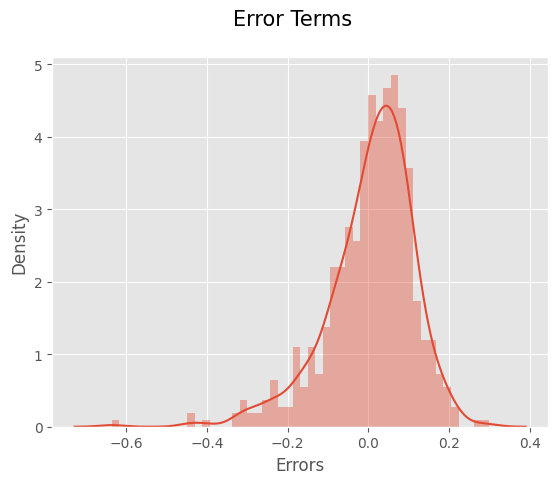

In [239]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 50)
fig.suptitle('Error Terms', fontsize= 15)                  # Plot heading 
plt.xlabel('Errors')                         # X-label

# Making Predictions Using the Final Model

In [240]:
# Standardize test data
data_test[num_vars] = scaler.transform(data_test[num_vars])

In [241]:
y_test = data_test.pop('cnt')
X_test = data_test

In [242]:
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.547945,0.569603,0.542752,0.635933,0.315127,0.226027,0.273973,0.280822,...,0.054795,0.089041,0.075342,0.191781,0.095890,0.082192,0.164384,0.130137,0.102740,0.232877
std,0.498699,0.182488,0.499409,0.238088,0.222120,0.156357,0.161524,0.419697,0.447530,0.450948,...,0.228362,0.285783,0.264852,0.395057,0.295454,0.275602,0.371899,0.337612,0.304664,0.424119
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.359075,0.346732,0.534457,0.196160,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,0.544652,0.614856,0.306383,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.801929,0.743337,0.730570,0.411976,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.800793,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [243]:
X_test_lm = X_test[X_train_lm.columns]	

In [244]:
# Create a fitted model
lr_13_test = sm.OLS(y_test, X_test_lm).fit()

In [245]:
# Making predictions
y_pred = lr_13_test.predict(X_test_lm)

In [246]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7397768344380575

In [247]:
# Evaluation of test via comparison of y_pred and y_test

Text(0, 0.5, 'y_pred')

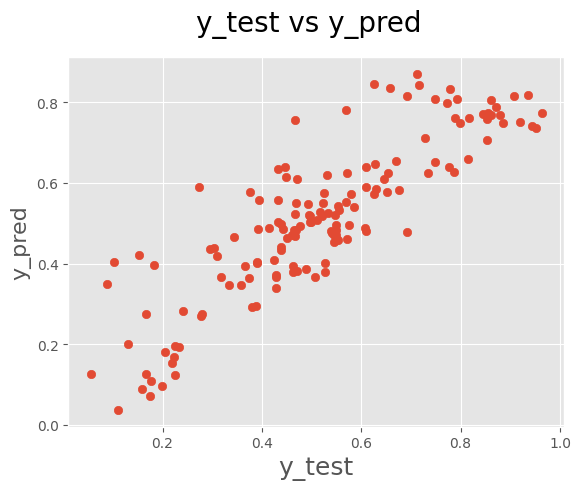

In [248]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [249]:
res= y_pred - y_test

Text(0, 0.5, 'y_pred')

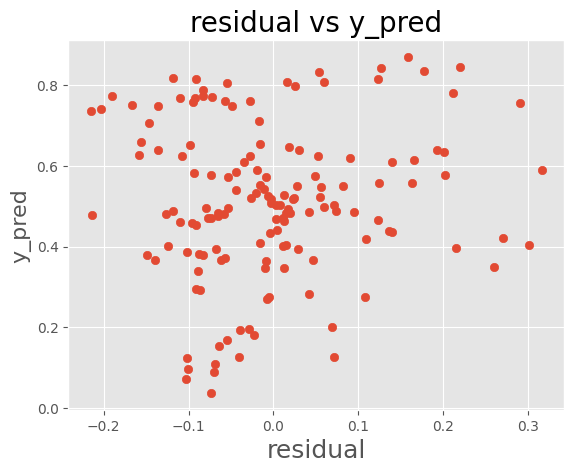

In [256]:
plt.scatter(res, y_pred)
plt.title('residual vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('residual', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  